# Vibration Soft Sensing Dataset: Step-by-Step Guide

This notebook demonstrates how to load, explore, filter, and process the vibration-based soft-sensing dataset stored in HDF5 format. Follow the steps and comments to understand each operation and adapt them for your own analysis.

---

## 1. Import Required Libraries and Classes
We start by importing standard libraries for data handling, HDF5 access, and progress bars. The key class is `VSS_File`, which provides an interface to the HDF5 dataset.

In [2]:
# Import all necessary libraries for data handling, HDF5 access, and progress bars.
# The VSS_File class is the main entry point for interacting with the dataset.
import os
import re
import csv
import h5py
import warnings
import tqdm
import numpy as np
import pandas as pd

from src.core.database import VSS_File

# If you are on Windows and encounter HDF5 file locking issues, uncomment the line below before importing h5py.
# os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

## 2. Load the HDF5 Dataset
Specify the path to your HDF5 file and create a `VSS_File` object. This object provides access to all compressor units and their test data.

In [3]:
# Define the path to your HDF5 dataset file and initialize the VSS_File object.
datasetPath = "C:\\Users\\pc_li\\Documents\\dataset.hdf5"
dataset = VSS_File(datasetPath)

## 3. Explore Dataset Structure
The `dataset` object now represents the entire HDF5 file. You can print it to see a summary, list all compressor units, and access their tests.

In [4]:
# Display a summary of the dataset object.
dataset

Vibration-based database for (5 units)

In [5]:
# List all compressor units in the dataset.
# The dataset is iterable, so you can loop through units and their tests.
dataset.units

[Vibration-based database for unit </1> (1668 tests),
 Vibration-based database for unit </2> (1138 tests),
 Vibration-based database for unit </3> (1186 tests),
 Vibration-based database for unit </4> (1184 tests),
 Vibration-based database for unit </5> (1187 tests)]

In [6]:
# List all tests for the first compressor unit.
dataset.units[0].tests

[Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[34,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[36,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[38,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[40,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[42,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[44,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[46,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[48,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[50,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[52,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[54,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-12,00]-[34,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-12,00]-[36,00]>,
 Vibration soft sensing test database </1/A1-2100-1-[-12,00]-[38,00]>,
 Vibra

In [7]:
# Access the first test of the first compressor unit.
dataset.units[0].tests[0]

Vibration soft sensing test database </1/A1-2100-1-[-10,00]-[34,00]>

## 4. Filter Tests by Attributes
You can filter tests based on metadata attributes (e.g., angular speed, condensing temperature). This is useful for selecting relevant experiments for your analysis.

In [8]:
# Define filter parameters to select tests with specific attributes.
filterAttributes = {
    "angularSpeed": [3600]
}

# Get a list of tests matching the filter criteria.
dataset.DataframeAsList(filterAttributes)

# Example: To filter by multiple attributes, add more keys/values.
# filterAttributes = {
#     "angularSpeed": [3600],
#     "condensingTemperature": [30, 40]
# }

[Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[34,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[36,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[38,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[40,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[42,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[44,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[46,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[48,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[50,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[52,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-10,00]-[54,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-12,00]-[34,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-12,00]-[36,00]>,
 Vibration soft sensing test database </1/A1-3600-1-[-12,00]-[38,00]>,
 Vibra

## 5. Access Individual Tests and Metadata
You can access a specific test by indexing into the units and tests lists. Each test stores metadata as attributes (e.g., type, angular speed, temperatures).

In [9]:
# List all metadata attribute keys for the first test of the first unit.
dataset.units[0].tests[0]._h5ref.attrs.keys()

<KeysViewHDF5 ['angularSpeed', 'condensingTemperature', 'evaporatingTemperature', 'repetition', 'type']>

## 6. Extract Numerical and Vibration Data
You can extract the main measurement data from each test. Numerical data includes temperatures, pressures, etc. Vibration data contains the raw sensor readings. Both can be returned as numpy arrays or pandas DataFrames.

In [11]:
# Get the numerical data for a test as a pandas DataFrame (with column headers).
dataset.units[0].tests[0].returnNumericalDataframe()

,rpm,t_evap_ref,t_cond_ref,t_evap,t_cond,t_suc,t_comp,t_dis,p_suc,p_int,p_dis
0,2100.0,-10.0,34.0,-10.0641,33.9262,29.7145,51.5706,57.9010,1.07799,3.29912,4.51336
1,2100.0,-10.0,34.0,-10.0681,33.8721,29.7868,51.7261,58.1109,1.07783,3.29878,4.50667
2,2100.0,-10.0,34.0,-10.0693,33.8408,30.1132,52.0800,58.1518,1.07778,3.29864,4.50280
3,2100.0,-10.0,34.0,-10.0719,33.7627,30.0912,51.7100,57.7116,1.07767,3.29836,4.49317
4,2100.0,-10.0,34.0,-10.0724,33.7171,30.0886,51.6939,57.8140,1.07765,3.29815,4.48755
5,2100.0,-10.0,34.0,-10.0757,33.6836,29.8887,51.3025,57.4557,1.07751,3.29751,4.48343
6,2100.0,-10.0,34.0,-10.0780,33.6618,29.9429,51.4205,57.5991,1.07742,3.29710,4.48074
7,2100.0,-10.0,34.0,-10.0827,33.6413,29.8874,51.2917,57.2152,1.07722,3.29623,4.47822
8,2100.0,-10.0,34.0,-10.0857,33.6388,30.0267,51.2542,56.7288,1.07710,3.29571,4.47792
9,2100.0,-10.0,34.0,-10.0886,33.6231,29.9287,51.0129,56.3499,1.07697,3.29531,4.47599


In [10]:
# Get the numerical data for a test as a numpy array.
dataset.units[0].tests[0].returnNumericalDatabase()

array([[ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00641e+01,
         3.39262e+01,  2.97145e+01,  5.15706e+01,  5.79010e+01,
         1.07799e+00,  3.29912e+00,  4.51336e+00],
       [ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00681e+01,
         3.38721e+01,  2.97868e+01,  5.17261e+01,  5.81109e+01,
         1.07783e+00,  3.29878e+00,  4.50667e+00],
       [ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00693e+01,
         3.38408e+01,  3.01132e+01,  5.20800e+01,  5.81518e+01,
         1.07778e+00,  3.29864e+00,  4.50280e+00],
       [ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00719e+01,
         3.37627e+01,  3.00912e+01,  5.17100e+01,  5.77116e+01,
         1.07767e+00,  3.29836e+00,  4.49317e+00],
       [ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00724e+01,
         3.37171e+01,  3.00886e+01,  5.16939e+01,  5.78140e+01,
         1.07765e+00,  3.29815e+00,  4.48755e+00],
       [ 2.10000e+03, -1.00000e+01,  3.40000e+01, -1.00757e+01,
         3.36836e+01,  2.98887e+01,  5.13

In [13]:
# Get the vibration data for a test as a pandas DataFrame (with column headers).
dataset.units[0].tests[0].returnVibrationDataframe()

,x,y,z
0,0.000020,0.000020,0.000020
1,-0.000007,-0.000009,0.000005
2,-0.000015,-0.000021,0.000008
3,-0.000022,-0.000011,0.000001
4,-0.000023,0.000004,-0.000003
...,...,...,...
511996,0.000037,-0.000242,-0.000571
511997,0.000032,-0.000244,-0.000591
511998,0.000035,-0.000235,-0.000605
511999,0.000051,-0.000234,-0.000608


In [14]:
# Get the vibration data for a test as a numpy array.
dataset.units[0].tests[0].returnVibrationDatabase()

array([[ 1.953125e-05,  1.953125e-05,  1.953125e-05],
       [-7.464880e-06, -9.439795e-06,  4.947181e-06],
       [-1.465110e-05, -2.088223e-05,  8.458936e-06],
       ...,
       [ 3.541385e-05, -2.350000e-04, -6.050000e-04],
       [ 5.100317e-05, -2.340000e-04, -6.080000e-04],
       [ 5.761198e-05, -2.390000e-04, -5.950000e-04]])

## 7. Visualize Vibration Signals
Let's extract the vibration DataFrame for a test and plot the X, Y, and Z signals over time. This helps to inspect the raw sensor data visually.

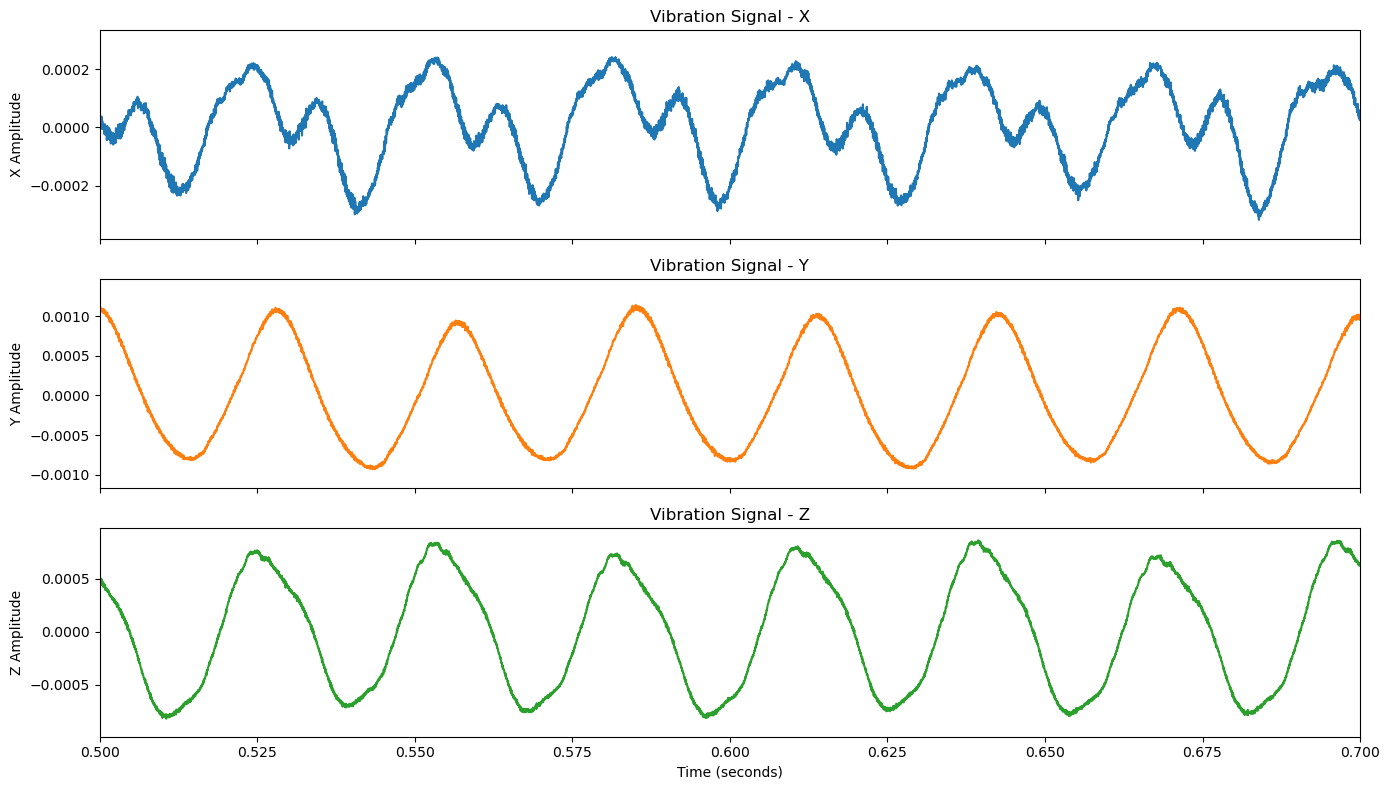

In [15]:
# Plot the X, Y, and Z vibration channels for a selected test.
# The time axis is calculated using the known sampling rate (Fs = 51.2 kHz).
import matplotlib.pyplot as plt

# Select a test (change indices as needed)
vib_df = dataset.units[0].tests[0].returnVibrationDataframe()

# Calculate time vector for plotting
Fs = 51200  # Hz (sampling frequency)
n_samples = len(vib_df)
t = np.arange(n_samples) / Fs  # time vector in seconds

fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
axs[0].plot(t, vib_df['x'], color='tab:blue')
axs[0].set_ylabel('X Amplitude')
axs[0].set_title('Vibration Signal - X')

axs[1].plot(t, vib_df['y'], color='tab:orange')
axs[1].set_ylabel('Y Amplitude')
axs[1].set_title('Vibration Signal - Y')

axs[2].plot(t, vib_df['z'], color='tab:green')
axs[2].set_ylabel('Z Amplitude')
axs[2].set_title('Vibration Signal - Z')
axs[2].set_xlabel('Time (seconds)')

# Optionally zoom in on a specific time window for clarity
for ax in axs:
    ax.set_xlim(0.5, 0.7)

plt.tight_layout()
plt.show()

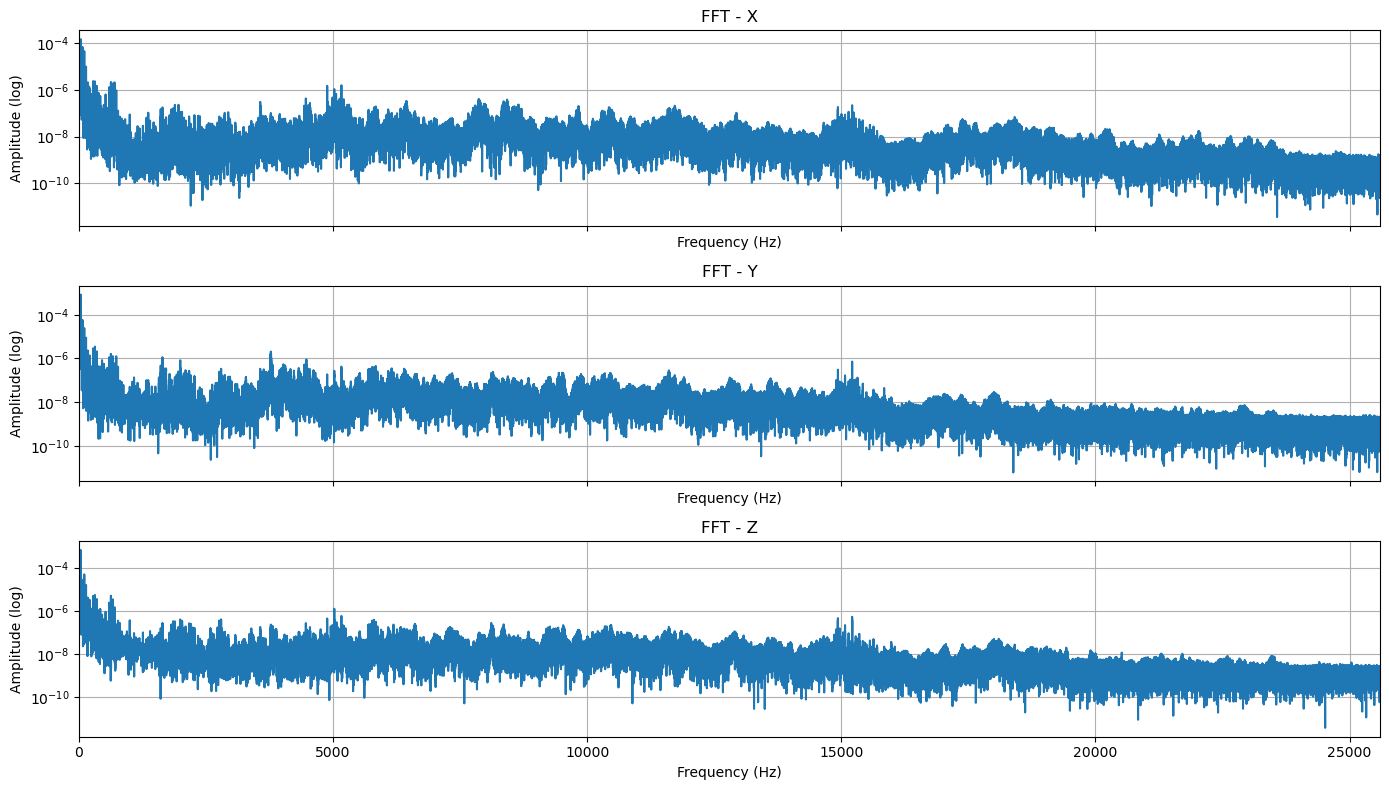

In [16]:
# Compute and plot the FFT (frequency spectrum) for each vibration channel.
# Use log scale for amplitude if desired. This helps identify dominant frequencies.
log_scale = True  # Set to False for linear amplitude scale

from src.processing.fft import raw_fft

fig, axs = plt.subplots(3, 1, figsize=(14, 8), sharex=True)
n = len(vib_df['x'])
freqs = np.fft.fftfreq(n, d=1/Fs)[:n//2+1]  # Frequency axis (up to Nyquist)

for idx, axis in enumerate(['x', 'y', 'z']):
    fft_vals = raw_fft(vib_df[axis].values, Fs)
    axs[idx].plot(freqs, fft_vals)
    if log_scale:
        axs[idx].set_yscale('log')
        axs[idx].set_ylabel('Amplitude (log)')
    else:
        axs[idx].set_ylabel('Amplitude')
    axs[idx].set_title(f'FFT - {axis.upper()}')
    axs[idx].set_xlabel('Frequency (Hz)')
    axs[idx].grid(True, which='both')
axs[2].set_xlim(0, Fs/2)  # Limit x-axis to Nyquist frequency
plt.tight_layout()
plt.show()

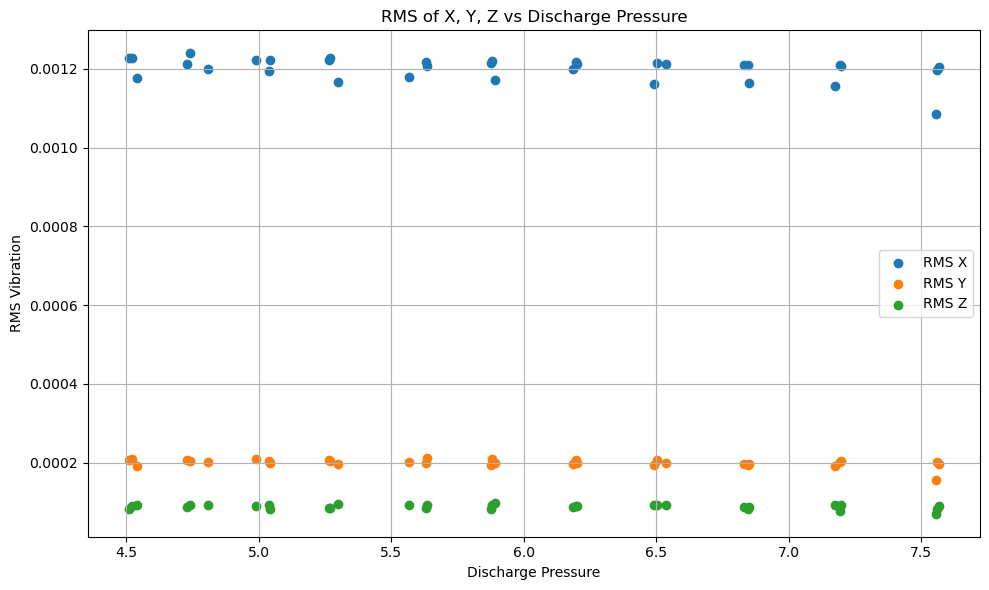

In [19]:
# Filter tests by multiple attributes and compute RMS vibration for each channel.
# Plot RMS values against discharge pressure to explore relationships.
filterAttributes = {
    "angularSpeed": [3600],
    "evaporatingTemperature": [20],
    "compressor": [1]
}

# Get filtered tests matching the criteria
filtered_tests = dataset.DataframeAsList(filterAttributes)

# Prepare lists to store results
rms_x, rms_y, rms_z, p_dis = [], [], [], []

for test in filtered_tests:
    vib = test.returnVibrationDatabase()  # shape: (N, 3) for x, y, z
    rms_x.append(np.sqrt(np.mean(vib[:, 0]**2)))
    rms_y.append(np.sqrt(np.mean(vib[:, 1]**2)))
    rms_z.append(np.sqrt(np.mean(vib[:, 2]**2)))
    # Get mean discharge pressure for this test (if available)
    num_df = test.returnNumericalDataframe()
    p_dis.append(num_df['p_dis'].mean() if 'p_dis' in num_df else np.nan)

# Plot RMS vs discharge pressure for each channel
plt.figure(figsize=(10, 6))
plt.scatter(p_dis, rms_x, label='RMS X', color='tab:blue')
plt.scatter(p_dis, rms_y, label='RMS Y', color='tab:orange')
plt.scatter(p_dis, rms_z, label='RMS Z', color='tab:green')
plt.xlabel('Discharge Pressure')
plt.ylabel('RMS Vibration')
plt.title('RMS of X, Y, Z vs Discharge Pressure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

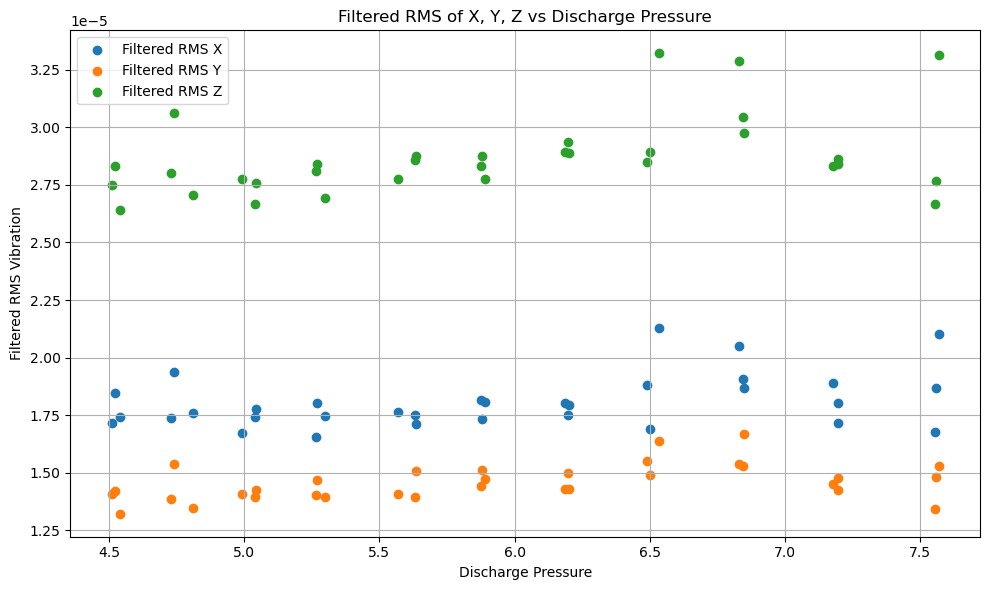

In [18]:
# Apply a Hanning window and high-pass filter to each vibration channel, then compute RMS.
# This helps remove low-frequency drift and focuses on the vibration energy of interest.
from scipy.signal import butter, filtfilt
import numpy as np

# High-pass filter design (e.g., cutoff at 100 Hz)
def highpass_filter(data, Fs, cutoff=100, order=4):
    nyq = 0.5 * Fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, data)

# Prepare lists to store results
rms_x_hp, rms_y_hp, rms_z_hp, p_dis = [], [], [], []

for test in filtered_tests:
    vib = test.returnVibrationDatabase()
    n = vib.shape[0]
    window = np.hanning(n)  # Smooths the signal edges to reduce FFT artifacts
    # Apply window to each channel
    x_win = vib[:, 0] * window
    y_win = vib[:, 1] * window
    z_win = vib[:, 2] * window
    # High-pass filter to remove low-frequency noise
    x_filt = highpass_filter(x_win, Fs)
    y_filt = highpass_filter(y_win, Fs)
    z_filt = highpass_filter(z_win, Fs)
    # Calculate RMS after filtering
    rms_x_hp.append(np.sqrt(np.mean(x_filt**2)))
    rms_y_hp.append(np.sqrt(np.mean(y_filt**2)))
    rms_z_hp.append(np.sqrt(np.mean(z_filt**2)))
    # Get mean discharge pressure for this test
    num_df = test.returnNumericalDataframe()
    p_dis.append(num_df['p_dis'].mean() if 'p_dis' in num_df else np.nan)

# Plot filtered RMS vs discharge pressure
plt.figure(figsize=(10, 6))
plt.scatter(p_dis, rms_x_hp, label='Filtered RMS X', color='tab:blue')
plt.scatter(p_dis, rms_y_hp, label='Filtered RMS Y', color='tab:orange')
plt.scatter(p_dis, rms_z_hp, label='Filtered RMS Z', color='tab:green')
plt.xlabel('Discharge Pressure')
plt.ylabel('Filtered RMS Vibration')
plt.title('Filtered RMS of X, Y, Z vs Discharge Pressure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()